# Lab assignment №1, part 3

This lab assignment consists of several parts. You are supposed to make some transformations, train some models, estimate the quality of the models and explain your results.

Several comments:
* Don't hesitate to ask questions, it's a good practice.
* No private/public sharing, please. The copied assignments will be graded with 0 points.
* Blocks of this lab will be graded separately.

__*This is the third part of the assignment. First and second parts are waiting for you in the same directory.*__

##  Part 3. SVM and kernels

Kernels concept get adopted in variety of ML algorithms (e.g. Kernel PCA, Gaussian Processes, kNN, ...).

So in this task you are to examine kernels for SVM algorithm applied to rather simple artificial datasets.

To make it clear: we will work with the classification problem through the whole notebook. 

In [1]:
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
import numpy as np

Let's generate our dataset and take a look on it.

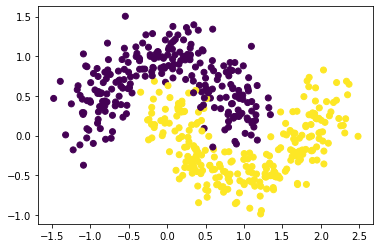

In [2]:
moons_points, moons_labels = make_moons(n_samples=500, noise=0.2, random_state=42)
plt.scatter(moons_points[:, 0], moons_points[:, 1], c=moons_labels)

In [3]:
#А давайте посмотрим на баланс классов
classes, class_counts = np.unique(moons_labels, return_counts=True)
print(classes)
print(class_counts)
print(class_counts/len(moons_labels)*100)

[0 1]
[250 250]
[50. 50.]


In [4]:
print(np.mean(moons_points), np.std(moons_points))

0.3867558112039452 0.7515432390295708


Было бы неплохо отнормировать данные. 
Раз классы сбалансированы, можно взять точность в качестве метрики.

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [6]:
moons_points_train, moons_points_test, moons_labels_train, moons_labels_test = train_test_split(
    moons_points, moons_labels, train_size=0.85, random_state=0, stratify=moons_labels)

## 1.1 Pure models.
First let's try to solve this case with good old Logistic Regression and simple (linear kernel) SVM classifier.

Train LR and SVM classifiers (choose params by hand, no CV or intensive grid search neeeded) and plot their decision regions. Calculate one preffered classification metric.

Describe results in one-two sentences.

_Tip:_ to plot classifiers decisions you colud use either sklearn examples ([this](https://scikit-learn.org/stable/auto_examples/neural_networks/plot_mlp_alpha.html#sphx-glr-auto-examples-neural-networks-plot-mlp-alpha-py) or any other) and mess with matplotlib yourself or great [mlxtend](https://github.com/rasbt/mlxtend) package (see their examples for details)

_Pro Tip:_ wirte function `plot_decisions` taking a dataset and an estimator and plotting the results cause you want to use it several times below

In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler


from mlxtend.plotting import plot_decision_regions

In [8]:
parameters_logreg = {
    'logisticregression__C': np.around(np.logspace(-1, 1.5, 10), decimals = 2)
    }

parameters_svm = {
    'svc__C': np.around(np.logspace(-1, 1.5, 10), decimals = 2)
    }


In [9]:
grid = GridSearchCV(make_pipeline(StandardScaler(), LogisticRegression(solver='saga', random_state = 0)), 
                           parameters_logreg, return_train_score=True)
grid.fit(moons_points_train, moons_labels_train)

grid.best_params_

{'logisticregression__C': 0.1}

In [10]:
grid = GridSearchCV(make_pipeline(StandardScaler(), SVC(kernel='linear', random_state = 0)), 
                           parameters_svm, return_train_score=True)
grid.fit(moons_points_train, moons_labels_train)

grid.best_params_

{'svc__C': 1.29}

In [11]:
lr = make_pipeline(StandardScaler(), LogisticRegression(solver='saga', random_state = 0, C=0.1)) # add some params
svm = make_pipeline(StandardScaler(), SVC(kernel='linear', random_state = 0, C=1.29)) # here too

lr.fit(moons_points_train, moons_labels_train)
svm.fit(moons_points_train, moons_labels_train)

predict_lr = lr.predict(moons_points_test)
predict_svm = svm.predict(moons_points_test)

print("lr  accuracy %f" % accuracy_score(moons_labels_test, predict_lr))
print("svm accuracy %f" % accuracy_score(moons_labels_test, predict_svm))

lr  accuracy 0.840000
svm accuracy 0.840000


In [41]:
def my_plot_decision_regions(X, y, clf, title):
  plot_decision_regions(X, y, clf=clf, legend=2)
  plt.title(title)
  plt.show()

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


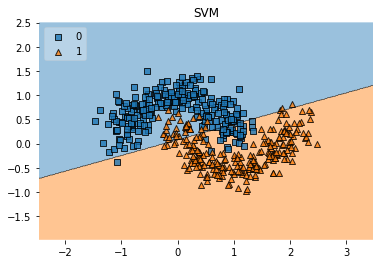

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


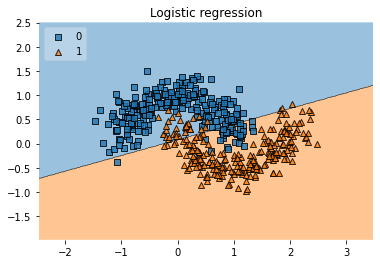

In [42]:
my_plot_decision_regions(moons_points, moons_labels, clf=svm, title ='SVM')

my_plot_decision_regions(moons_points, moons_labels, clf=svm, title ='Logistic regression')

Два линейных метода разделили выборку, как смогли, то есть линейно. Все выглядит логично :)


## 1.2 Kernel tirck

Now use different kernels (`poly`, `rbf`, `sigmoid`) on SVC to get better results. Play `degree` parameter and others.

For each kernel estimate optimal params, plot decision regions, calculate metric you've chosen eariler.

Write couple of sentences on:

* What have happenned with classification quality?
* How did decision border changed for each kernel?
* What `degree` have you chosen and why?

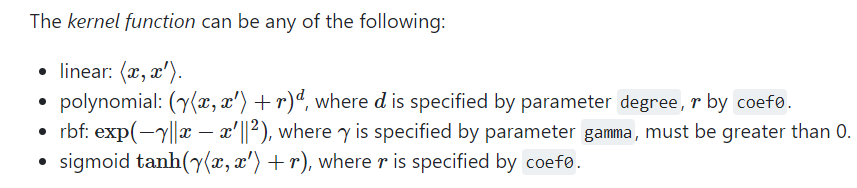

In [14]:
#poly 
parameters_svm_poly = {
    'svc__C': np.around(np.logspace(-1, 1.5, 10), decimals = 2),
    'svc__degree' : np.arange(1, 5)
    }


grid = GridSearchCV(make_pipeline(StandardScaler(), SVC(kernel='poly', random_state = 0)), 
                           parameters_svm_poly, return_train_score=True)
grid.fit(moons_points_train, moons_labels_train)

grid.best_params_

{'svc__C': 16.68, 'svc__degree': 3}

svm accuracy 0.840000
svm poly accuracy 0.866667


/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


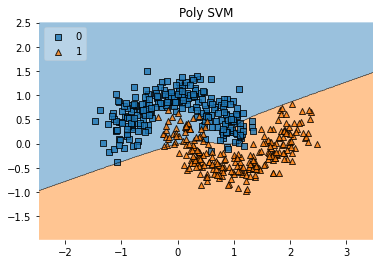

In [15]:
svm_poly = make_pipeline(StandardScaler(), SVC(kernel='poly', random_state = 0, C=16.68, degree = 3))

svm_poly.fit(moons_points_train, moons_labels_train)

predict_svm_poly = svm_poly.predict(moons_points_test)

print("svm accuracy %f" % accuracy_score(moons_labels_test, predict_svm))
print("svm poly accuracy %f" % accuracy_score(moons_labels_test, predict_svm_poly))

my_plot_decision_regions(moons_points, moons_labels, clf=svm_poly, title ='Poly SVM')

In [16]:
#poly with coef0
parameters_svm_poly = {
    'svc__C': np.around(np.logspace(-1, 1.5, 10), decimals = 2),
    'svc__degree' : np.arange(1, 6), 
    'svc__coef0' : np.around(np.linspace(-10, 10, 10), decimals = 2)
    }


grid = GridSearchCV(make_pipeline(StandardScaler(), SVC(kernel='poly', random_state = 0)), 
                           parameters_svm_poly, return_train_score=True)
grid.fit(moons_points_train, moons_labels_train)

grid.best_params_

{'svc__C': 0.1, 'svc__coef0': 5.56, 'svc__degree': 5}

svm accuracy 0.840000
svm poly accuracy 0.973333


/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


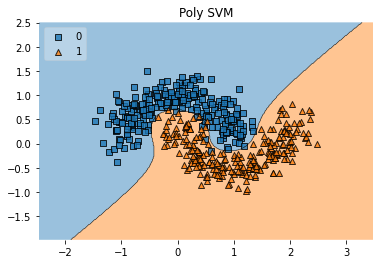

In [17]:
svm_poly = make_pipeline(StandardScaler(), SVC(kernel='poly', random_state = 0, C=0.1, coef0=5.56 , degree = 5))

svm_poly.fit(moons_points_train, moons_labels_train)

predict_svm_poly = svm_poly.predict(moons_points_test)

print("svm accuracy %f" % accuracy_score(moons_labels_test, predict_svm))
print("svm poly accuracy %f" % accuracy_score(moons_labels_test, predict_svm_poly))

my_plot_decision_regions(moons_points, moons_labels, clf=svm_poly, title ='Poly SVM')

Справился хорошо. Без coef0 было хуже.

Давайте посмотрим, как будет меняться разделяющая поверхность при увеличении degree 

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


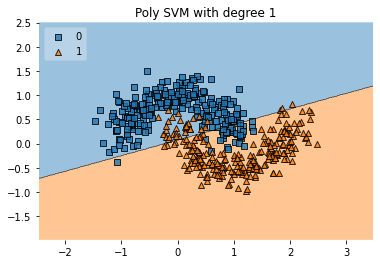

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


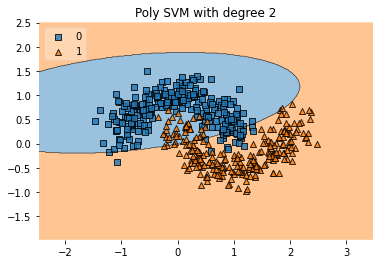

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


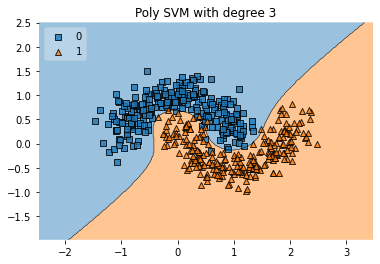

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


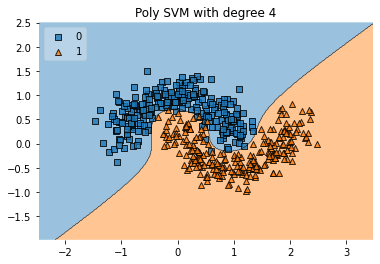

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


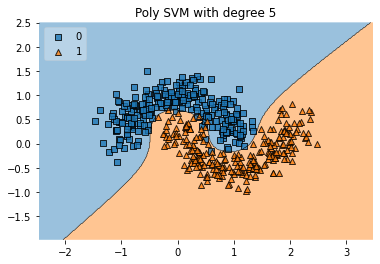

In [18]:
for i in range(1, 6): 
  clf = make_pipeline(StandardScaler(), SVC(kernel='poly', C=10, coef0=1, degree = i, random_state = 0))
  clf.fit(moons_points_train, moons_labels_train)
  my_plot_decision_regions(moons_points, moons_labels, clf=clf, title =f'Poly SVM with degree {i}')
  plt.show()

При увеличении степени, более сложные поверхности получаем.

Можно заметить симметрию для четных степеней.


In [19]:
#rbf
grid = GridSearchCV(make_pipeline(StandardScaler(), SVC(kernel='rbf', random_state = 0)), 
                           parameters_svm, return_train_score=True)
grid.fit(moons_points_train, moons_labels_train)

grid.best_params_

{'svc__C': 16.68}

svm accuracy 0.840000
svm rbf accuracy 0.973333


/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


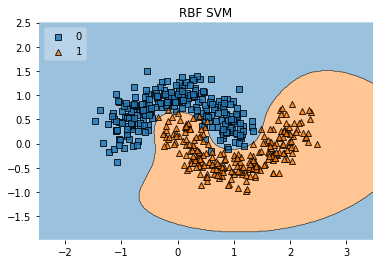

In [20]:
svm_rbf = make_pipeline(StandardScaler(), SVC(kernel='rbf', random_state = 0, C=16.68))

svm_rbf.fit(moons_points_train, moons_labels_train)

predict_svm_rbf = svm_rbf.predict(moons_points_test)

print("svm accuracy %f" % accuracy_score(moons_labels_test, predict_svm))
print("svm rbf accuracy %f" % accuracy_score(moons_labels_test, predict_svm_rbf))

my_plot_decision_regions(moons_points, moons_labels, clf=svm_rbf, title ='RBF SVM')

Ну чтож, RBF вырезал "кружочек" (замкнутую штуку) и хорошо справился с задачей.

In [21]:
#sigmoid
parameters_svm_sigmoid = {
    'svc__C': np.around(np.logspace(-1, 1.5, 10), decimals = 2),
    'svc__coef0' : np.around(np.linspace(-10, 10, 10), decimals = 2)
    }

grid = GridSearchCV(make_pipeline(StandardScaler(), SVC(kernel='sigmoid', random_state = 0)), 
                           parameters_svm_sigmoid, return_train_score=True)
grid.fit(moons_points_train, moons_labels_train)

grid.best_params_

{'svc__C': 31.62, 'svc__coef0': -3.33}

svm accuracy 0.840000
svm sigmoid accuracy 0.946667


/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


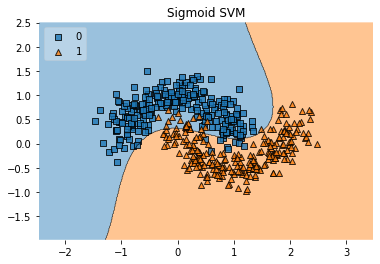

In [22]:
svm_sigmoid = make_pipeline(StandardScaler(), SVC(kernel='sigmoid', random_state = 0, C = 31.62, coef0 = -3.33))

svm_sigmoid.fit(moons_points_train, moons_labels_train)

predict_svm_sigmoid = svm_sigmoid.predict(moons_points_test)

print("svm accuracy %f" % accuracy_score(moons_labels_test, predict_svm))
print("svm sigmoid accuracy %f" % accuracy_score(moons_labels_test, predict_svm_sigmoid))

my_plot_decision_regions(moons_points, moons_labels, clf=svm_sigmoid, title ='Sigmoid SVM')

Посмотрим результаты всех ядер.

In [23]:
print("svm accuracy %f" % accuracy_score(moons_labels_test, predict_svm))
print("svm poly accuracy %f" % accuracy_score(moons_labels_test, predict_svm_poly))
print("svm rbf accuracy %f" % accuracy_score(moons_labels_test, predict_svm_rbf))
print("svm sigmoid accuracy %f" % accuracy_score(moons_labels_test, predict_svm_sigmoid))

svm accuracy 0.840000
svm poly accuracy 0.973333
svm rbf accuracy 0.973333
svm sigmoid accuracy 0.946667


RBF и poly одинаково хороши!


## 1.3 Simpler solution (of a kind)
What is we could use Logisitc Regression to successfully solve this task?

Feature generation is a thing to help here. Different techniques of feature generation are used in real life, couple of them will be covered in additional lectures.

In particular case simple `PolynomialFeatures` ([link](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html)) are able to save the day.

Generate the set of new features, train LR on it, plot decision regions, calculate metric.

* Comare SVM's results with this solution (quality, borders type)
* What degree of PolynomialFeatures have you used? Compare with same SVM kernel parameter.

In [24]:
from sklearn.preprocessing import PolynomialFeatures

In [25]:
parameters_lr_poly = {
    'logisticregression__C': np.around(np.logspace(-1, 1.5, 10), decimals = 2), 
    'polynomialfeatures__degree': np.arange(1,6)
    }

grid = GridSearchCV(make_pipeline(PolynomialFeatures(), StandardScaler(), LogisticRegression(max_iter= 500, solver='saga', random_state = 0)), 
                           parameters_lr_poly, return_train_score=True)
grid.fit(moons_points_train, moons_labels_train)

grid.best_params_

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter

{'logisticregression__C': 8.8, 'polynomialfeatures__degree': 4}

In [26]:
lr_poly = make_pipeline(PolynomialFeatures(4), StandardScaler(), LogisticRegression(solver='saga', C = 8.8, random_state = 0))

lr_poly.fit(moons_points_train, moons_labels_train)

predict_lr_poly = lr_poly.predict(moons_points_test)

print("lr  accuracy %f" % accuracy_score(moons_labels_test, predict_lr))
print("lr poly accuracy %f" % accuracy_score(moons_labels_test, predict_lr_poly))

lr  accuracy 0.840000
lr poly accuracy 0.973333


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


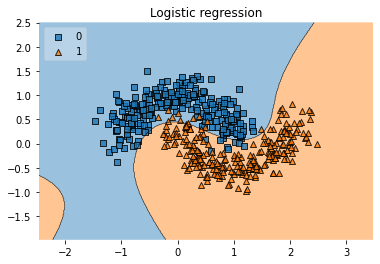

In [27]:
my_plot_decision_regions(moons_points, moons_labels, clf=lr_poly, title ='Logistic regression')

Стало лучше, но все равно RBF с ядрами rbf и poly оказался лучше. 

Если посмотреть на SVM с degree 3, понятно, что минимальная степень нам нужна 3, чтобы разделить данные. В обоих случаях мы меняем пространство фичей, в случае SVM с помощью ядра, в случае LR с помощью генерации новых фич.

## 1.4 Harder problem

Let's make this task a bit more challenging via upgrading dataset:

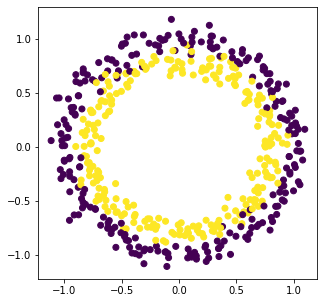

In [28]:
from sklearn.datasets import make_circles

circles_points, circles_labels = make_circles(n_samples=500, noise=0.06, random_state=42)

plt.figure(figsize=(5, 5))
plt.scatter(circles_points[:, 0], circles_points[:, 1], c=circles_labels)

And even more:

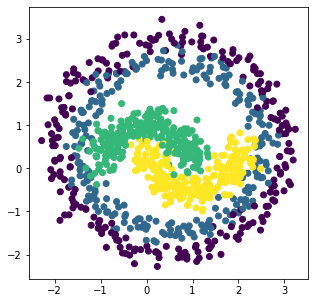

In [29]:
points = np.vstack((circles_points*2.5 + 0.5, moons_points))
labels = np.hstack((circles_labels, moons_labels + 2)) # + 2 to distinct moons classes

plt.figure(figsize=(5, 5))
plt.scatter(points[:, 0], points[:, 1], c=labels)

Now do your best using all the approaches above!

Tune LR with generated features, SVM with appropriate kernel of your choice. You may add some of your loved models to demonstrate their (and your) strength. Again plot decision regions, calculate metric.

Justify the results in a few phrases.

In [30]:
points_train, points_test, labels_train, labels_test = train_test_split(
    points, labels, train_size=0.85, random_state=0, stratify=labels)

In [31]:
#rbf
grid = GridSearchCV(make_pipeline(StandardScaler(), SVC(kernel='rbf', random_state = 0)), 
                           parameters_svm, return_train_score=True)
grid.fit(points_train, labels_train)

grid.best_params_

{'svc__C': 8.8}

svm rbf accuracy 0.906667


/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


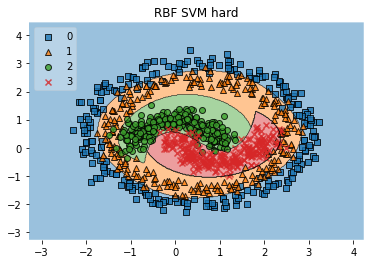

In [32]:
### Попробуем RBF
svm_rbf_hard = make_pipeline(StandardScaler(), SVC(kernel='rbf', random_state = 0, C=8.8))

svm_rbf_hard.fit(points_train, labels_train)

predict_svm_rbf_hard = svm_rbf_hard.predict(points_test)

print("svm rbf accuracy %f" % accuracy_score(labels_test, predict_svm_rbf_hard))

my_plot_decision_regions(points, labels, clf=svm_rbf_hard, title ='RBF SVM hard')

In [33]:
# Попробуем poly
parameters_svm_poly = {
    'svc__C': np.around(np.logspace(-1, 1.5, 10), decimals = 2),
    'svc__degree' : np.arange(1, 6), 
    'svc__coef0' : np.around(np.linspace(-10, 10, 10), decimals = 2)
    }


grid = GridSearchCV(make_pipeline(StandardScaler(), SVC(kernel='poly', random_state = 0)), 
                           parameters_svm_poly, return_train_score=True)
grid.fit(points_train, labels_train)

grid.best_params_

{'svc__C': 1.29, 'svc__coef0': 1.11, 'svc__degree': 5}

svm poly accuracy 0.913333


/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


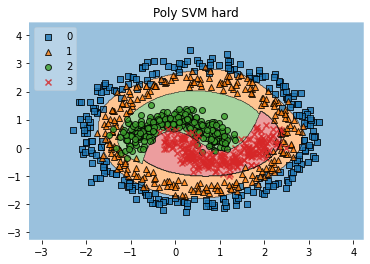

In [34]:
svm_poly_hard = make_pipeline(StandardScaler(), SVC(kernel='poly', random_state = 0, C = 1.29, coef0 = 1.11 , degree = 5))

svm_poly_hard.fit(points_train, labels_train)

predict_svm_poly_hard = svm_poly_hard.predict(points_test)

print("svm poly accuracy %f" % accuracy_score(labels_test, predict_svm_poly_hard))

my_plot_decision_regions(points, labels, clf=svm_poly_hard, title ='Poly SVM hard')

In [35]:
parameters_lr_poly = {
    'logisticregression__C': np.around(np.logspace(-1, 1.5, 10), decimals = 2), 
    'polynomialfeatures__degree': np.arange(1,7)
    }

grid = GridSearchCV(make_pipeline(PolynomialFeatures(), StandardScaler(), LogisticRegression(max_iter= 500, solver='saga', random_state = 0)), 
                           parameters_lr_poly, return_train_score=True)
grid.fit(points_train, labels_train)

grid.best_params_

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter

{'logisticregression__C': 16.68, 'polynomialfeatures__degree': 4}

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


lr poly accuracy 0.893333


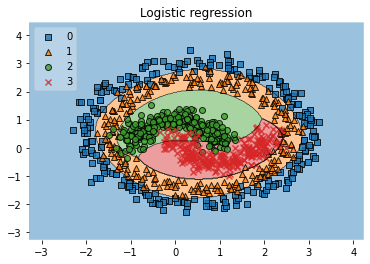

In [36]:
lr_poly_hard = make_pipeline(PolynomialFeatures(4), StandardScaler(), LogisticRegression(solver='saga', C = 16.68, random_state = 0))

lr_poly_hard.fit(points_train, labels_train)

predict_lr_poly_hard = lr_poly_hard.predict(points_test)

print("lr poly accuracy %f" % accuracy_score(labels_test, predict_lr_poly_hard))

my_plot_decision_regions(points, labels, clf=lr_poly_hard, title ='Logistic regression')

Хорошо строить разделяющую поверхность умеет Random Forest

Попробуем его 


In [37]:
from sklearn.ensemble import RandomForestClassifier

parameters_forest = {
    'n_estimators': np.arange(10,200,30)
    }

grid = GridSearchCV(RandomForestClassifier(random_state = 0), 
                           parameters_forest, return_train_score=True)
grid.fit(points_train, labels_train)

grid.best_params_

{'n_estimators': 130}

Random forest accuracy 0.886667


/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


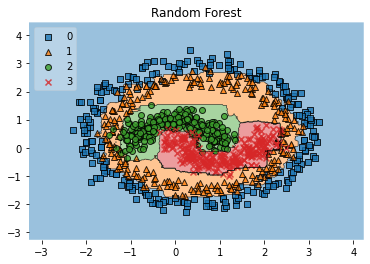

In [38]:
forest =  RandomForestClassifier(n_estimators = 130, random_state = 0)

forest.fit(points_train, labels_train)

predict_forest = forest.predict(points_test)

print("Random forest accuracy %f" % accuracy_score(labels_test, predict_forest))

my_plot_decision_regions(points, labels, clf=forest, title ='Random Forest')

Видимо, граница, описываемая деревьями не очень хорошо описывает наши данные (они же синтетические, все таки). Поэтому линейные алгоритмы справились лучше. 

Посмотрим на результаты.

svm rbf accuracy 0.906667
lr poly accuracy 0.893333
svm poly accuracy 0.913333
Random forest accuracy 0.886667


/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


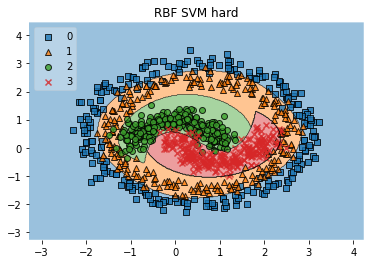

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


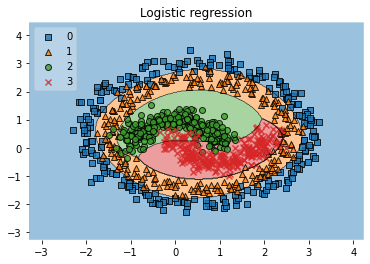

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


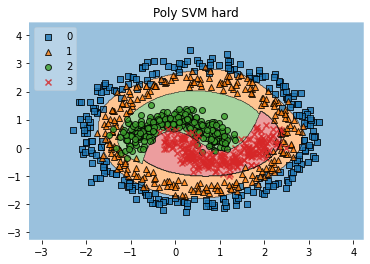

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


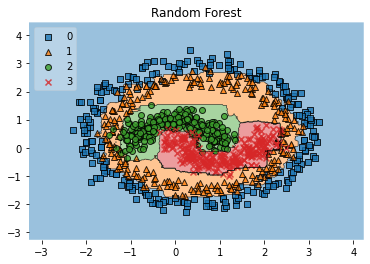

In [43]:
print("svm rbf accuracy %f" % accuracy_score(labels_test, predict_svm_rbf_hard))
print("lr poly accuracy %f" % accuracy_score(labels_test, predict_lr_poly_hard))
print("svm poly accuracy %f" % accuracy_score(labels_test, predict_svm_poly_hard))
print("Random forest accuracy %f" % accuracy_score(labels_test, predict_forest))

my_plot_decision_regions(points, labels, clf=svm_rbf_hard, title ='RBF SVM hard')
my_plot_decision_regions(points, labels, clf=lr_poly_hard, title ='Logistic regression')
my_plot_decision_regions(points, labels, clf=svm_poly_hard, title ='Poly SVM hard')
my_plot_decision_regions(points, labels, clf=forest, title ='Random Forest')

Лучшие результаты оказались у настроенного SVM.